# Know the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

In [2]:
# Code to control the randomness

import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(1234)


In [4]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
sns.set(style="darkgrid")

In [5]:
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)

In [6]:
data = pd.read_csv("Banknote_Authentication.csv")
data.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
data.tail(5)

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [8]:
data.shape

(1372, 5)

In [9]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [10]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [11]:
X = data.iloc[:,0:4]
y = data.iloc[:,-1]

In [12]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


# Balancing The Data

In [13]:
y.value_counts()

0    762
1    610
Name: class, dtype: int64

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X, y = sm.fit_resample(X,y)
pd.Series(y).value_counts()

1    762
0    762
Name: class, dtype: int64

In [15]:
type(X)

pandas.core.frame.DataFrame

# Train-Test 

In [16]:
X.shape, y.shape

((1524, 4), (1524,))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Splitting into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.2,random_state=8)

In [19]:
X_train.shape, y_train.shape

((1219, 4), (1219,))

# Scaling The Data

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train

array([[0.68297889, 0.87367234, 0.08781097, 0.64503487],
       [0.33333333, 0.51046172, 0.25793439, 0.81528774],
       [0.53157519, 0.35157509, 0.42466237, 0.6873619 ],
       ...,
       [0.75192725, 0.64295767, 0.26690374, 0.80012003],
       [0.30309586, 0.26951738, 0.67938915, 0.73897906],
       [0.91751581, 0.81378923, 0.11205979, 0.69312311]])

# Libraries for Model

In [23]:
X_test.shape, y_test.shape

((305, 4), (305,))

In [24]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

In [26]:
import keras
import tensorflow as tf

# Model with Sigmoidal Activation Function

In [40]:
def sigmoid(x):
    return K.sigmoid(x)

## Model Build

In [41]:
# Usage
model = Sequential()
model.add(Dense(10, input_dim = 4))
model.add(Activation(sigmoid, name='CustomSigmoid'))

model.add(Dense(1,activation='sigmoid'))                   

model.add(Dense(1))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                50        
_________________________________________________________________
CustomSigmoid (Activation)   (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2         
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
opt = keras.optimizers.Adam(learning_rate=0.01)

In [43]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer= opt)

In [44]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
]

## Model Fit

In [45]:
results = model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=60, callbacks=callbacks)

Epoch 1/60
39/39 [==============================] - 0s 8ms/step - loss: 0.8088 - accuracy: 0.4995 - val_loss: 0.6961 - val_accuracy: 0.5123
Epoch 2/60
39/39 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5333 - val_loss: 0.6881 - val_accuracy: 0.5574
Epoch 3/60
39/39 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.6646 - val_loss: 0.6749 - val_accuracy: 0.6393
Epoch 4/60
39/39 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.6800 - val_loss: 0.6516 - val_accuracy: 0.7336
Epoch 5/60
39/39 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.7744 - val_loss: 0.6120 - val_accuracy: 0.7541
Epoch 6/60
39/39 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.7949 - val_loss: 0.5568 - val_accuracy: 0.7705
Epoch 7/60
39/39 [==============================] - 0s 1ms/step - loss: 0.5077 - accuracy: 0.8154 - val_loss: 0.4938 - val_accuracy: 0.7787
Epoch 8/60
39/39 [==

## Model Evaluate

In [46]:
model.evaluate(X_test,y_test,verbose=2)

10/10 - 0s - loss: 0.0246 - accuracy: 0.9902


[0.024562763050198555, 0.9901639223098755]

In [47]:
predict = model.predict(X_test)
predictions = predict > 0.5

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
from sklearn.metrics import cohen_kappa_score

In [50]:
cms = confusion_matrix(y_test, predictions)

In [51]:
cms

array([[152,   2],
       [  1, 150]], dtype=int64)

In [52]:
FPs = cms[0][1]
FNs = cms[1][0]
TPs = cms[0][0]
TNs = cms[1][1]

### Important Metric Score

In [53]:
print('False Positives\n {}'.format(FPs))
print('False Negetives\n {}'.format(FNs))
print('True Positives\n {}'.format(TPs))
print('True Negetives\n {}'.format(TNs))

Precision = TPs/(TPs+FPs)
print('Precision \n {}'.format(Precision))
Recall = TPs/(TPs+FNs)
print('Recall \n {}'.format(Recall))
Acc = (TPs+TNs)/(TPs+TNs+FPs+FNs)
print('Áccuracy \n{}'.format(Acc))
F1score = 2*(Precision*Recall)/(Precision+Recall)
print('F1Score \n{}'.format(F1score))
k=cohen_kappa_score(y_test, predictions)
print('Çohen Kappa \n{}'.format(k))


False Positives
 2
False Negetives
 1
True Positives
 152
True Negetives
 150
Precision 
 0.987012987012987
Recall 
 0.9934640522875817
Áccuracy 
0.9901639344262295
F1Score 
0.990228013029316
Çohen Kappa 
0.9803272344176647


In [54]:
model.save('banknote_model_sig.h5')

In [55]:
dfs = pd.DataFrame.from_dict(results.history)
dfs.head()

,loss,accuracy,val_loss,val_accuracy
0,0.808777,0.499487,0.696140,0.512295
1,0.692607,0.533333,0.688051,0.557377
2,0.680890,0.664615,0.674936,0.639344
3,0.662342,0.680000,0.651557,0.733607
4,0.630212,0.774359,0.612025,0.754098


### Train vs Test Loss

In [54]:
dfs_loss = dfs[["loss","val_loss"]]

Text(0.5, 0, 'Epochs')

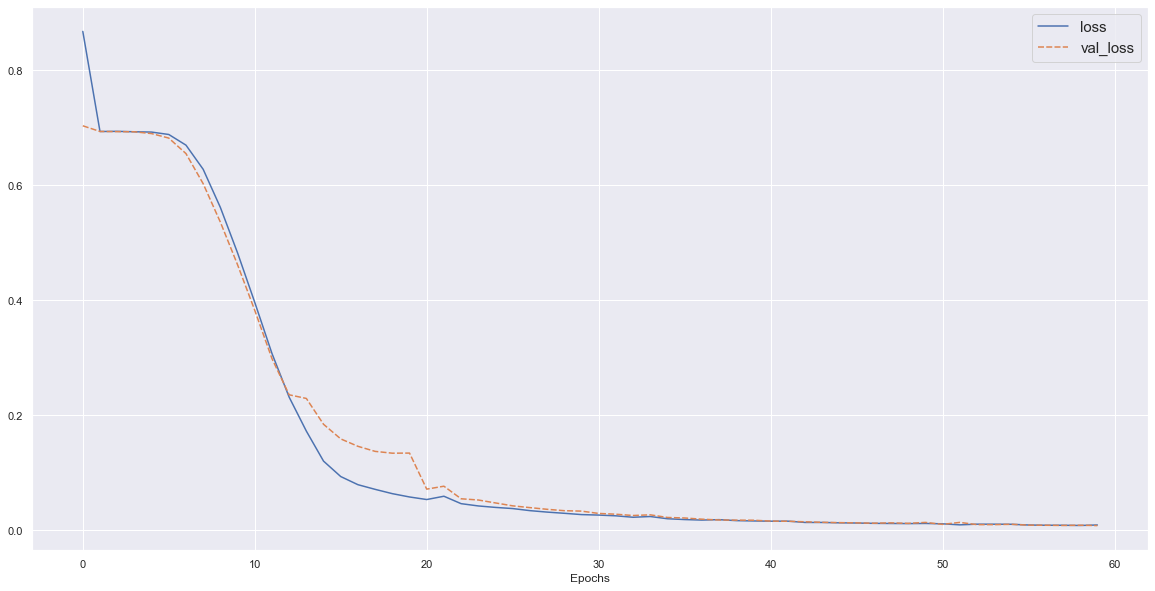

In [71]:
sns.lineplot(data=dfs_loss)
plt.legend(prop={"size":15})
plt.xlabel("Epochs")

### Train vs Test Accuracy

In [61]:
dfs_acc = dfs[["accuracy","val_accuracy"]]

Text(0.5, 0, 'Epochs')

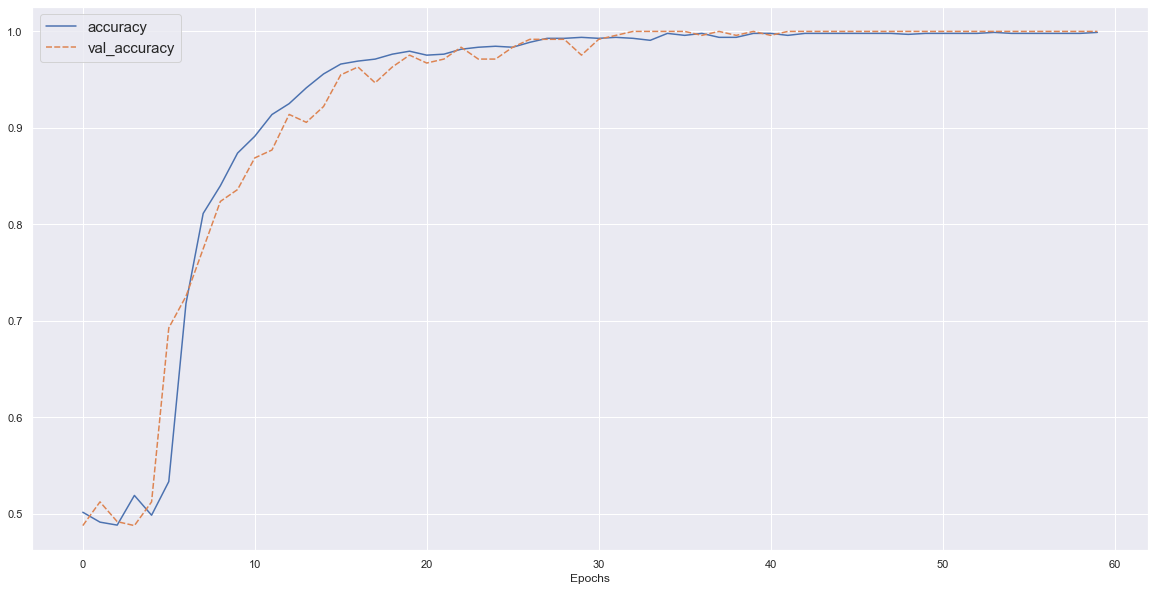

In [72]:
sns.lineplot(data=dfs_acc)
plt.legend(prop={"size":15})
plt.xlabel("Epochs")

### Loss Function vs Epochs

In [69]:
dfs_lossf = dfs[["loss"]]

Text(0.5, 0, 'Epochs')

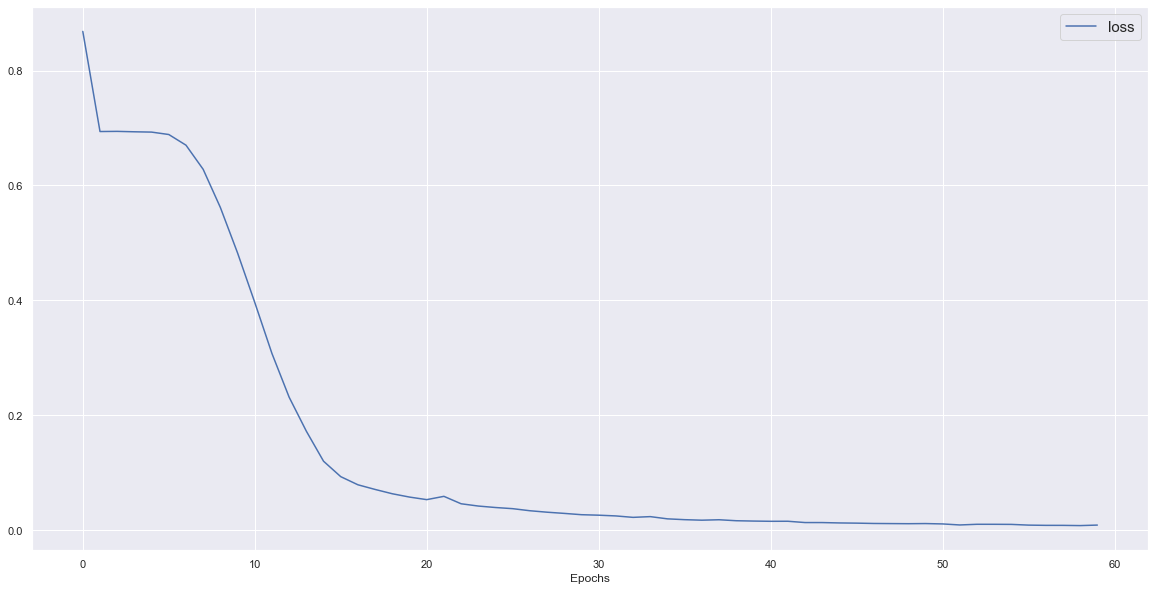

In [73]:
sns.lineplot(data=dfs_lossf)
plt.legend(prop={"size":15})
plt.xlabel("Epochs")

# Model with k0 and k1

In [63]:
def relu(x):
    return (k0 +k1*x)

In [114]:
def model_build():
    model = Sequential()
    model.add(Dense(10, input_dim = 4))
    model.add(Activation(relu, name='CustomRelu'))

    model.add(Dense(1,activation='sigmoid')) 

    model.add(Dense(1))

    opt = keras.optimizers.Adam(learning_rate=0.01)
    
    model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer= opt)
    
    callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    #tf.keras.callbacks.TensorBoard(log_dir = 'logs')
    ]
    
    results = model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=60, callbacks=callbacks, verbose=0)
    
    print(model.evaluate(X_test,y_test,verbose=0))
    
    l = model.evaluate(X_test,y_test,verbose=0)[0]
    v = model.evaluate(X_test,y_test,verbose=0)[1]
    return l,v

## Calculation of k1

In [65]:
k0 = 0 #Independent of k0
k1 = -250

In [66]:
loss_arr = []
acc_arr = []

In [67]:
best_k1 = ''
max_acc = 0.5 

In [68]:
for _ in tqdm(range(101)):
    print(k1)
    l,v = model_build()
    
    if v > max_acc:
        best_k1 = k1
        max_acc = v
    
        print("Validation Loss = ", l)
        print("Validation Accuracy = ", v)
        
    
    loss_arr.append(l)
    acc_arr.append(v)
    
    k1 = k1 + 5
    

  0%|          | 0/101 [00:00<?, ?it/s]

-250


  1%|          | 1/101 [00:00<01:19,  1.26it/s]

[7.636612892150879, 0.5049180388450623]
Validation Loss =  7.636612892150879
Validation Accuracy =  0.5049180388450623
-245


  2%|▏         | 2/101 [00:01<01:19,  1.25it/s]

[7.636612892150879, 0.5049180388450623]
-240


  3%|▎         | 3/101 [00:02<01:24,  1.16it/s]

[0.6930986642837524, 0.5049180388450623]
-235


  4%|▍         | 4/101 [00:03<01:22,  1.18it/s]

[7.636612892150879, 0.5049180388450623]
-230


  5%|▍         | 5/101 [00:04<01:20,  1.20it/s]

[7.699615955352783, 0.49508196115493774]
-225


  6%|▌         | 6/101 [00:05<01:26,  1.10it/s]

[0.6930986046791077, 0.5049180388450623]
-220


  7%|▋         | 7/101 [00:06<01:43,  1.11s/it]

[0.22926950454711914, 0.9475409984588623]
Validation Loss =  0.22926950454711914
Validation Accuracy =  0.9475409984588623
-215


  8%|▊         | 8/101 [00:07<01:37,  1.05s/it]

[7.636612892150879, 0.5049180388450623]
-210


  9%|▉         | 9/101 [00:08<01:35,  1.04s/it]

[7.699615955352783, 0.49508196115493774]
-205


 10%|▉         | 10/101 [00:09<01:29,  1.02it/s]

[7.636612892150879, 0.5049180388450623]
-200


 11%|█         | 11/101 [00:10<01:24,  1.06it/s]

[7.699615955352783, 0.49508196115493774]
-195


 12%|█▏        | 12/101 [00:11<01:28,  1.01it/s]

[7.636612892150879, 0.5049180388450623]
-190


 13%|█▎        | 13/101 [00:12<01:22,  1.07it/s]

[7.636612892150879, 0.5049180388450623]
-185


 14%|█▍        | 14/101 [00:13<01:17,  1.12it/s]

[7.636612892150879, 0.5049180388450623]
-180


 15%|█▍        | 15/101 [00:14<01:15,  1.13it/s]

[7.636612892150879, 0.5049180388450623]
-175


 16%|█▌        | 16/101 [00:15<01:19,  1.07it/s]

[7.636612892150879, 0.5049180388450623]
-170


 17%|█▋        | 17/101 [00:16<01:20,  1.05it/s]

[0.6931885480880737, 0.5049180388450623]
-165


 18%|█▊        | 18/101 [00:17<01:21,  1.02it/s]

[0.6931037902832031, 0.5049180388450623]
-160


 19%|█▉        | 19/101 [00:18<01:23,  1.01s/it]

[7.636612892150879, 0.5049180388450623]
-155


 20%|█▉        | 20/101 [00:19<01:18,  1.03it/s]

[7.636612892150879, 0.5049180388450623]
-150


 21%|██        | 21/101 [00:20<01:15,  1.06it/s]

[7.636612892150879, 0.5049180388450623]
-145


 22%|██▏       | 22/101 [00:20<01:12,  1.10it/s]

[7.636612892150879, 0.5049180388450623]
-140


 23%|██▎       | 23/101 [00:21<01:15,  1.03it/s]

[0.6931535601615906, 0.49508196115493774]
-135


 24%|██▍       | 24/101 [00:22<01:11,  1.08it/s]

[7.636612892150879, 0.5049180388450623]
-130


 25%|██▍       | 25/101 [00:23<01:07,  1.12it/s]

[7.636612892150879, 0.5049180388450623]
-125


 26%|██▌       | 26/101 [00:24<01:08,  1.09it/s]

[7.636612892150879, 0.5049180388450623]
-120


 27%|██▋       | 27/101 [00:25<01:05,  1.12it/s]

[0.6931246519088745, 0.5049180388450623]
-115


 28%|██▊       | 28/101 [00:26<01:06,  1.10it/s]

[0.7412933111190796, 0.7540983557701111]
-110


 29%|██▊       | 29/101 [00:27<01:03,  1.13it/s]

[7.636612892150879, 0.5049180388450623]
-105


 30%|██▉       | 30/101 [00:28<01:06,  1.07it/s]

[0.6931000351905823, 0.5049180388450623]
-100


 31%|███       | 31/101 [00:29<01:02,  1.12it/s]

[7.636612892150879, 0.5049180388450623]
-95


 32%|███▏      | 32/101 [00:29<01:00,  1.14it/s]

[7.636612892150879, 0.5049180388450623]
-90


 33%|███▎      | 33/101 [00:30<01:02,  1.08it/s]

[7.636612892150879, 0.5049180388450623]
-85


 34%|███▎      | 34/101 [00:31<01:02,  1.07it/s]

[0.6932826638221741, 0.49508196115493774]
-80


 35%|███▍      | 35/101 [00:32<00:58,  1.12it/s]

[7.636612892150879, 0.5049180388450623]
-75


 36%|███▌      | 36/101 [00:33<00:56,  1.16it/s]

[7.699615955352783, 0.49508196115493774]
-70


 37%|███▋      | 37/101 [00:34<00:58,  1.10it/s]

[7.636612892150879, 0.5049180388450623]
-65


 38%|███▊      | 38/101 [00:35<00:55,  1.14it/s]

[7.699615955352783, 0.49508196115493774]
-60


 39%|███▊      | 39/101 [00:36<00:53,  1.17it/s]

[7.636612892150879, 0.5049180388450623]
-55


 40%|███▉      | 40/101 [00:37<00:54,  1.11it/s]

[7.636612892150879, 0.5049180388450623]
-50


 41%|████      | 41/101 [00:37<00:51,  1.16it/s]

[7.699615955352783, 0.49508196115493774]
-45


 42%|████▏     | 42/101 [00:38<00:52,  1.12it/s]

[0.6948956847190857, 0.49508196115493774]
-40


 43%|████▎     | 43/101 [00:39<00:50,  1.14it/s]

[0.6932147741317749, 0.5049180388450623]
-35


 44%|████▎     | 44/101 [00:40<00:53,  1.07it/s]

[7.699615955352783, 0.49508196115493774]
-30


 45%|████▍     | 45/101 [00:41<00:52,  1.07it/s]

[0.69324791431427, 0.5049180388450623]
-25


 46%|████▌     | 46/101 [00:42<00:49,  1.12it/s]

[7.636612892150879, 0.5049180388450623]
-20


 47%|████▋     | 47/101 [00:43<00:50,  1.08it/s]

[7.636612892150879, 0.5049180388450623]
-15


 48%|████▊     | 48/101 [00:44<00:47,  1.12it/s]

[7.636612892150879, 0.5049180388450623]
-10


 49%|████▊     | 49/101 [00:45<00:44,  1.16it/s]

[7.636612892150879, 0.5049180388450623]
-5


 50%|████▉     | 50/101 [00:46<00:50,  1.01it/s]

[0.033473700284957886, 0.980327844619751]
Validation Loss =  0.033473700284957886
Validation Accuracy =  0.980327844619751
0


 50%|█████     | 51/101 [00:47<00:50,  1.02s/it]

[0.6932437419891357, 0.49508196115493774]
5


 51%|█████▏    | 52/101 [00:48<00:46,  1.05it/s]

[7.636612892150879, 0.5049180388450623]
10


 52%|█████▏    | 53/101 [00:49<00:43,  1.10it/s]

[7.636612892150879, 0.5049180388450623]
15


 53%|█████▎    | 54/101 [00:50<00:52,  1.13s/it]

[0.6931203603744507, 0.5049180388450623]
20


 54%|█████▍    | 55/101 [00:51<00:48,  1.04s/it]

[0.6996156573295593, 0.5049180388450623]
25


 55%|█████▌    | 56/101 [00:52<00:44,  1.01it/s]

[0.693107545375824, 0.5049180388450623]
30


 56%|█████▋    | 57/101 [00:53<00:40,  1.08it/s]

[7.636612892150879, 0.5049180388450623]
35


 57%|█████▋    | 58/101 [00:54<00:40,  1.06it/s]

[1.1094413995742798, 0.5049180388450623]
40


 58%|█████▊    | 59/101 [00:55<00:41,  1.02it/s]

[0.6934292316436768, 0.5049180388450623]
45


 59%|█████▉    | 60/101 [00:56<00:39,  1.05it/s]

[7.699615955352783, 0.49508196115493774]
50


 60%|██████    | 61/101 [00:57<00:38,  1.05it/s]

[0.7043673396110535, 0.49508196115493774]
55


 61%|██████▏   | 62/101 [00:58<00:38,  1.01it/s]

[7.636612892150879, 0.5049180388450623]
60


 62%|██████▏   | 63/101 [00:58<00:35,  1.08it/s]

[7.699615955352783, 0.49508196115493774]
65


 63%|██████▎   | 64/101 [00:59<00:34,  1.07it/s]

[0.6931722164154053, 0.5049180388450623]
70


 64%|██████▍   | 65/101 [01:00<00:34,  1.05it/s]

[7.636612892150879, 0.5049180388450623]
75


 65%|██████▌   | 66/101 [01:01<00:33,  1.05it/s]

[0.6932318806648254, 0.49508196115493774]
80


 66%|██████▋   | 67/101 [01:02<00:31,  1.08it/s]

[0.6931050419807434, 0.5049180388450623]
85


 67%|██████▋   | 68/101 [01:03<00:29,  1.13it/s]

[7.699615955352783, 0.49508196115493774]
90


 68%|██████▊   | 69/101 [01:04<00:29,  1.07it/s]

[7.636612892150879, 0.5049180388450623]
95


 69%|██████▉   | 70/101 [01:05<00:27,  1.14it/s]

[7.699615955352783, 0.49508196115493774]
100


 70%|███████   | 71/101 [01:05<00:25,  1.19it/s]

[7.636612892150879, 0.5049180388450623]
105
[0.6948087215423584, 0.5049180388450623]


 71%|███████▏  | 72/101 [01:07<00:25,  1.12it/s]

110


 72%|███████▏  | 73/101 [01:07<00:23,  1.18it/s]

[7.699615955352783, 0.49508196115493774]
115


 73%|███████▎  | 74/101 [01:08<00:22,  1.22it/s]

[7.636612892150879, 0.5049180388450623]
120


 74%|███████▍  | 75/101 [01:09<00:21,  1.23it/s]

[0.6931615471839905, 0.49508196115493774]
125


 75%|███████▌  | 76/101 [01:10<00:21,  1.17it/s]

[7.636612892150879, 0.5049180388450623]
130


 76%|███████▌  | 77/101 [01:11<00:19,  1.21it/s]

[7.636612892150879, 0.5049180388450623]
135


 77%|███████▋  | 78/101 [01:11<00:18,  1.25it/s]

[7.636612892150879, 0.5049180388450623]
140


 78%|███████▊  | 79/101 [01:12<00:17,  1.27it/s]

[7.636612892150879, 0.5049180388450623]
145


 79%|███████▉  | 80/101 [01:13<00:17,  1.18it/s]

[7.636612892150879, 0.5049180388450623]
150


 80%|████████  | 81/101 [01:14<00:17,  1.15it/s]

[0.693105936050415, 0.5049180388450623]
155


 81%|████████  | 82/101 [01:15<00:16,  1.14it/s]

[0.6103591322898865, 0.8032786846160889]
160


 82%|████████▏ | 83/101 [01:16<00:15,  1.19it/s]

[7.636612892150879, 0.5049180388450623]
165


 83%|████████▎ | 84/101 [01:17<00:14,  1.14it/s]

[0.6933996081352234, 0.5049180388450623]
170


 84%|████████▍ | 85/101 [01:17<00:13,  1.18it/s]

[7.699615955352783, 0.49508196115493774]
175


 85%|████████▌ | 86/101 [01:18<00:12,  1.22it/s]

[7.699615955352783, 0.49508196115493774]
180


 86%|████████▌ | 87/101 [01:19<00:11,  1.22it/s]

[7.636612892150879, 0.5049180388450623]
185


 87%|████████▋ | 88/101 [01:20<00:11,  1.15it/s]

[7.699615955352783, 0.49508196115493774]
190


 88%|████████▊ | 89/101 [01:21<00:10,  1.20it/s]

[7.636612892150879, 0.5049180388450623]
195


 89%|████████▉ | 90/101 [01:21<00:08,  1.23it/s]

[7.636612892150879, 0.5049180388450623]
200


 90%|█████████ | 91/101 [01:22<00:08,  1.16it/s]

[0.6931003928184509, 0.5049180388450623]
205


 91%|█████████ | 92/101 [01:23<00:07,  1.17it/s]

[7.636612892150879, 0.5049180388450623]
210


 92%|█████████▏| 93/101 [01:24<00:06,  1.17it/s]

[7.699615955352783, 0.49508196115493774]
215


 93%|█████████▎| 94/101 [01:25<00:06,  1.13it/s]

[0.6933056712150574, 0.49508196115493774]
220


 94%|█████████▍| 95/101 [01:26<00:05,  1.10it/s]

[7.636612892150879, 0.5049180388450623]
225


 95%|█████████▌| 96/101 [01:27<00:04,  1.15it/s]

[7.636612892150879, 0.5049180388450623]
230


 96%|█████████▌| 97/101 [01:28<00:03,  1.19it/s]

[7.636612892150879, 0.5049180388450623]
235


 97%|█████████▋| 98/101 [01:28<00:02,  1.22it/s]

[7.699615955352783, 0.49508196115493774]
240


 98%|█████████▊| 99/101 [01:29<00:01,  1.15it/s]

[7.636612892150879, 0.5049180388450623]
245


 99%|█████████▉| 100/101 [01:30<00:00,  1.14it/s]

[1.2270773649215698, 0.7114754319190979]
250


100%|██████████| 101/101 [01:31<00:00,  1.10it/s]

[7.636612892150879, 0.5049180388450623]


In [133]:
# Maximum Accuracy Obtained
print("Maximum accuracy ",max_acc,"and k1 is ", best_k1)

Maximum accuracy  980327844619751 and k1 is  -5


In [ ]:
#name = 'banknote_model' + str(k1) +'_' + str(k0)+ '.h5'

## Calculation of k0 with k1 fixed

In [135]:
loss_arr_k0 = []
acc_arr_k0 = []

In [136]:
k0 = -250
best_k0 = 0
k1 = -5
# max_acc will remain unaltered 

In [137]:
for _ in tqdm(range(101)):
    print(k0)
    l,v = model_build()
    
    if v > max_acc:
        max_acc = v
        best_k0 = k0
        
        print("Validation Loss = ", l)
        print("Validation Accuracy = ", v)
        
    
    loss_arr_k0.append(l)
    acc_arr_k0.append(v)
    
    k0 = k0 + 5
    

  0%|          | 0/101 [00:00<?, ?it/s]

-250


  1%|          | 1/101 [00:00<01:20,  1.25it/s]

[7.636612892150879, 0.5049180388450623]
-245


  2%|▏         | 2/101 [00:01<01:19,  1.24it/s]

[7.636612892150879, 0.5049180388450623]
-240


  3%|▎         | 3/101 [00:02<01:18,  1.24it/s]

[7.636612892150879, 0.5049180388450623]
-235


  4%|▍         | 4/101 [00:03<01:18,  1.24it/s]

[7.636612892150879, 0.5049180388450623]
-230


  5%|▍         | 5/101 [00:04<01:17,  1.24it/s]

[7.699615955352783, 0.49508196115493774]
-225


  6%|▌         | 6/101 [00:04<01:16,  1.25it/s]

[7.636612892150879, 0.5049180388450623]
-220


  7%|▋         | 7/101 [00:06<01:29,  1.06it/s]

[7.636612892150879, 0.5049180388450623]
-215


  8%|▊         | 8/101 [00:06<01:24,  1.11it/s]

[7.636612892150879, 0.5049180388450623]
-210


  9%|▉         | 9/101 [00:07<01:20,  1.14it/s]

[7.636612892150879, 0.5049180388450623]
-205


 10%|▉         | 10/101 [00:08<01:21,  1.12it/s]

[0.6933984756469727, 0.49508196115493774]
-200


 11%|█         | 11/101 [00:09<01:19,  1.14it/s]

[0.6931821703910828, 0.5049180388450623]
-195


 12%|█▏        | 12/101 [00:10<01:17,  1.15it/s]

[7.636612892150879, 0.5049180388450623]
-190


 13%|█▎        | 13/101 [00:11<01:15,  1.16it/s]

[7.636612892150879, 0.5049180388450623]
-185


 14%|█▍        | 14/101 [00:11<01:13,  1.19it/s]

[0.6940039396286011, 0.5049180388450623]
-180


 15%|█▍        | 15/101 [00:13<01:26,  1.01s/it]

[7.636612892150879, 0.5049180388450623]
-175


 16%|█▌        | 16/101 [00:14<01:21,  1.04it/s]

[7.636612892150879, 0.5049180388450623]
-170


 17%|█▋        | 17/101 [00:15<01:17,  1.08it/s]

[7.636612892150879, 0.5049180388450623]
-165


 18%|█▊        | 18/101 [00:15<01:15,  1.10it/s]

[7.636612892150879, 0.5049180388450623]
-160


 19%|█▉        | 19/101 [00:16<01:13,  1.12it/s]

[7.636612892150879, 0.5049180388450623]
-155


 20%|█▉        | 20/101 [00:17<01:12,  1.12it/s]

[7.636612892150879, 0.5049180388450623]
-150


 21%|██        | 21/101 [00:18<01:10,  1.13it/s]

[7.636612892150879, 0.5049180388450623]
-145
[7.636612892150879, 0.5049180388450623]


 22%|██▏       | 22/101 [00:19<01:21,  1.03s/it]

-140


 23%|██▎       | 23/101 [00:20<01:15,  1.03it/s]

[7.636612892150879, 0.5049180388450623]
-135


 24%|██▍       | 24/101 [00:21<01:16,  1.01it/s]

[7.636612892150879, 0.5049180388450623]
-130


 25%|██▍       | 25/101 [00:22<01:12,  1.05it/s]

[7.699615955352783, 0.49508196115493774]
-125


 26%|██▌       | 26/101 [00:23<01:08,  1.09it/s]

[7.699615955352783, 0.49508196115493774]
-120


 27%|██▋       | 27/101 [00:24<01:05,  1.13it/s]

[7.636612892150879, 0.5049180388450623]
-115


 28%|██▊       | 28/101 [00:25<01:04,  1.13it/s]

[7.636612892150879, 0.5049180388450623]
-110


 29%|██▊       | 29/101 [00:26<01:02,  1.16it/s]

[7.699615955352783, 0.49508196115493774]
-105


 30%|██▉       | 30/101 [00:26<01:00,  1.17it/s]

[7.636612892150879, 0.5049180388450623]
-100


 31%|███       | 31/101 [00:28<01:10,  1.01s/it]

[7.636612892150879, 0.5049180388450623]
-95


 32%|███▏      | 32/101 [00:29<01:05,  1.05it/s]

[7.636612892150879, 0.5049180388450623]
-90


 33%|███▎      | 33/101 [00:29<01:02,  1.08it/s]

[7.699615955352783, 0.49508196115493774]
-85


 34%|███▎      | 34/101 [00:30<00:59,  1.13it/s]

[7.636612892150879, 0.5049180388450623]
-80


 35%|███▍      | 35/101 [00:31<00:56,  1.16it/s]

[7.636612892150879, 0.5049180388450623]
-75


 36%|███▌      | 36/101 [00:32<00:54,  1.19it/s]

[7.636612892150879, 0.5049180388450623]
-70


 37%|███▋      | 37/101 [00:33<00:52,  1.21it/s]

[7.699615955352783, 0.49508196115493774]
-65


 38%|███▊      | 38/101 [00:33<00:51,  1.23it/s]

[7.636612892150879, 0.5049180388450623]
-60


 39%|███▊      | 39/101 [00:35<01:02,  1.02s/it]

[0.6931945085525513, 0.49508196115493774]
-55


 40%|███▉      | 40/101 [00:36<00:57,  1.06it/s]

[7.636612892150879, 0.5049180388450623]
-50


 41%|████      | 41/101 [00:36<00:54,  1.11it/s]

[7.636612892150879, 0.5049180388450623]
-45


 42%|████▏     | 42/101 [00:37<00:51,  1.15it/s]

[7.636612892150879, 0.5049180388450623]
-40


 43%|████▎     | 43/101 [00:38<00:53,  1.08it/s]

[0.6932371258735657, 0.5049180388450623]
-35


 44%|████▎     | 44/101 [00:39<00:50,  1.13it/s]

[7.699615955352783, 0.49508196115493774]
-30


 45%|████▍     | 45/101 [00:40<00:48,  1.16it/s]

[7.636612892150879, 0.5049180388450623]
-25


 46%|████▌     | 46/101 [00:41<00:56,  1.03s/it]

[7.636612892150879, 0.5049180388450623]
-20


 47%|████▋     | 47/101 [00:42<00:51,  1.04it/s]

[7.636612892150879, 0.5049180388450623]
-15


 48%|████▊     | 48/101 [00:43<00:48,  1.09it/s]

[7.636612892150879, 0.5049180388450623]
-10


 49%|████▊     | 49/101 [00:44<00:56,  1.09s/it]

[7.636612892150879, 0.5049180388450623]
-5


 50%|████▉     | 50/101 [00:45<00:52,  1.02s/it]

[7.636612892150879, 0.5049180388450623]
0


 50%|█████     | 51/101 [00:46<00:47,  1.04it/s]

[7.636612892150879, 0.5049180388450623]
5


 51%|█████▏    | 52/101 [00:47<00:49,  1.00s/it]

[0.06387628614902496, 0.9672130942344666]
10


 52%|█████▏    | 53/101 [00:48<00:45,  1.05it/s]

[0.6931028962135315, 0.5049180388450623]
15


 53%|█████▎    | 54/101 [00:49<00:50,  1.08s/it]

[7.636612892150879, 0.5049180388450623]
20


 54%|█████▍    | 55/101 [00:50<00:45,  1.01it/s]

[7.636612892150879, 0.5049180388450623]
25


 55%|█████▌    | 56/101 [00:51<00:42,  1.07it/s]

[7.636612892150879, 0.5049180388450623]
30


 56%|█████▋    | 57/101 [00:52<00:39,  1.12it/s]

[7.636612892150879, 0.5049180388450623]
35


 57%|█████▋    | 58/101 [00:53<00:37,  1.14it/s]

[7.636612892150879, 0.5049180388450623]
40


 58%|█████▊    | 59/101 [00:53<00:36,  1.16it/s]

[7.636612892150879, 0.5049180388450623]
45


 59%|█████▉    | 60/101 [00:54<00:34,  1.18it/s]

[7.699615955352783, 0.49508196115493774]
50


 60%|██████    | 61/101 [00:55<00:33,  1.19it/s]

[7.699615955352783, 0.49508196115493774]
55


 61%|██████▏   | 62/101 [00:56<00:32,  1.20it/s]

[7.636612892150879, 0.5049180388450623]
60


 62%|██████▏   | 63/101 [00:57<00:38,  1.01s/it]

[7.636612892150879, 0.5049180388450623]
65


 63%|██████▎   | 64/101 [00:58<00:35,  1.05it/s]

[7.636612892150879, 0.5049180388450623]
70


 64%|██████▍   | 65/101 [00:59<00:32,  1.09it/s]

[7.636612892150879, 0.5049180388450623]
75


 65%|██████▌   | 66/101 [01:00<00:30,  1.14it/s]

[7.636612892150879, 0.5049180388450623]
80


 66%|██████▋   | 67/101 [01:01<00:29,  1.16it/s]

[7.636612892150879, 0.5049180388450623]
85


 67%|██████▋   | 68/101 [01:01<00:27,  1.18it/s]

[7.699615955352783, 0.49508196115493774]
90


 68%|██████▊   | 69/101 [01:02<00:26,  1.20it/s]

[7.636612892150879, 0.5049180388450623]
95


 69%|██████▉   | 70/101 [01:03<00:25,  1.22it/s]

[7.636612892150879, 0.5049180388450623]
100


 70%|███████   | 71/101 [01:04<00:29,  1.03it/s]

[7.636612892150879, 0.5049180388450623]
105


 71%|███████▏  | 72/101 [01:05<00:26,  1.09it/s]

[7.636612892150879, 0.5049180388450623]
110


 72%|███████▏  | 73/101 [01:06<00:24,  1.14it/s]

[7.636612892150879, 0.5049180388450623]
115


 73%|███████▎  | 74/101 [01:07<00:23,  1.17it/s]

[7.636612892150879, 0.5049180388450623]
120


 74%|███████▍  | 75/101 [01:08<00:22,  1.14it/s]

[0.693748950958252, 0.49508196115493774]
125


 75%|███████▌  | 76/101 [01:08<00:21,  1.17it/s]

[7.636612892150879, 0.5049180388450623]
130


 76%|███████▌  | 77/101 [01:09<00:20,  1.16it/s]

[0.6932465434074402, 0.5049180388450623]
135


 77%|███████▋  | 78/101 [01:10<00:19,  1.19it/s]

[7.636612892150879, 0.5049180388450623]
140


 78%|███████▊  | 79/101 [01:11<00:18,  1.21it/s]

[7.636612892150879, 0.5049180388450623]
145


 79%|███████▉  | 80/101 [01:12<00:20,  1.01it/s]

[7.636612892150879, 0.5049180388450623]
150


 80%|████████  | 81/101 [01:13<00:18,  1.06it/s]

[7.636612892150879, 0.5049180388450623]
155


 81%|████████  | 82/101 [01:14<00:17,  1.10it/s]

[7.636612892150879, 0.5049180388450623]
160


 82%|████████▏ | 83/101 [01:15<00:15,  1.14it/s]

[7.636612892150879, 0.5049180388450623]
165


 83%|████████▎ | 84/101 [01:15<00:14,  1.18it/s]

[7.636612892150879, 0.5049180388450623]
170


 84%|████████▍ | 85/101 [01:17<00:14,  1.10it/s]

[0.6931197047233582, 0.5049180388450623]
175


 85%|████████▌ | 86/101 [01:17<00:13,  1.12it/s]

[7.636612892150879, 0.5049180388450623]
180


 86%|████████▌ | 87/101 [01:18<00:12,  1.14it/s]

[0.6931753754615784, 0.49508196115493774]
185


 87%|████████▋ | 88/101 [01:20<00:13,  1.01s/it]

[7.636612892150879, 0.5049180388450623]
190


 88%|████████▊ | 89/101 [01:20<00:11,  1.04it/s]

[7.636612892150879, 0.5049180388450623]
195


 89%|████████▉ | 90/101 [01:21<00:10,  1.08it/s]

[7.636612892150879, 0.5049180388450623]
200


 90%|█████████ | 91/101 [01:22<00:08,  1.12it/s]

[7.636612892150879, 0.5049180388450623]
205


 91%|█████████ | 92/101 [01:23<00:08,  1.10it/s]

[0.6938072443008423, 0.5049180388450623]
210


 92%|█████████▏| 93/101 [01:24<00:07,  1.14it/s]

[7.699615955352783, 0.49508196115493774]
215


 93%|█████████▎| 94/101 [01:25<00:06,  1.16it/s]

[7.636612892150879, 0.5049180388450623]
220


 94%|█████████▍| 95/101 [01:26<00:05,  1.12it/s]

[0.6938287615776062, 0.49508196115493774]
225


 95%|█████████▌| 96/101 [01:27<00:05,  1.03s/it]

[7.636612892150879, 0.5049180388450623]
230


 96%|█████████▌| 97/101 [01:28<00:03,  1.04it/s]

[7.699615955352783, 0.49508196115493774]
235


 97%|█████████▋| 98/101 [01:29<00:02,  1.08it/s]

[7.636612892150879, 0.5049180388450623]
240


 98%|█████████▊| 99/101 [01:29<00:01,  1.12it/s]

[7.636612892150879, 0.5049180388450623]
245


 99%|█████████▉| 100/101 [01:30<00:00,  1.16it/s]

[7.636612892150879, 0.5049180388450623]
250


100%|██████████| 101/101 [01:31<00:00,  1.10it/s]

[7.699615955352783, 0.49508196115493774]


In [138]:
# Maximum Accuracy Obtained
print("Maximum accuracy ",max_acc,"and k0 is ", best_k0)

Maximum accuracy  980327844619751 and k0 is  0


## Model Build

In [163]:
k0 = 0
k1 = -5

In [164]:
model = Sequential()
model.add(Dense(10, input_dim = 4))
model.add(Activation(relu, name='CustomRelu'))

model.add(Dense(1,activation='sigmoid')) 

model.add(Dense(1))

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer= opt)

callbacks = [
tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
#tf.keras.callbacks.TensorBoard(log_dir = 'logs')
]

results = model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=60, callbacks=callbacks, verbose=0)


In [165]:
print(model.evaluate(X_test,y_test,verbose=0))

[0.10035069286823273, 0.9836065769195557]


In [166]:
name = 'banknote_model' + str(k1) +'_' + str(k0)+ '.h5'

In [167]:
model.save(name)

## Result Evaluation

In [168]:
model.evaluate(X_test,y_test,verbose=2)

10/10 - 0s - loss: 0.1004 - accuracy: 0.9836


[0.10035069286823273, 0.9836065769195557]

In [169]:
predict = model.predict(X_test)
predictions = predict > 0.5

In [170]:
cmk = confusion_matrix(y_test, predictions)

In [171]:
cmk

array([[150,   4],
       [  1, 150]], dtype=int64)

In [172]:
FPk = cmk[0][1]
FNk = cmk[1][0]
TPk = cmk[0][0]
TNk = cmk[1][1]

### Important Metric Score

In [173]:
print('False Positives\n {}'.format(FPk))
print('False Negetives\n {}'.format(FNk))
print('True Positives\n {}'.format(TPk))
print('True Negetives\n {}'.format(TNk))

Precision = TPk/(TPk+FPk)
print('Precision \n {}'.format(Precision))
Recall = TPk/(TPk+FNk)
print('Recall \n {}'.format(Recall))
Acc = (TPk+TNk)/(TPk+TNk+FPk+FNk)
print('Áccuracy \n{}'.format(Acc))
F1score = 2*(Precision*Recall)/(Precision+Recall)
print('F1Score \n{}'.format(F1score))
k=cohen_kappa_score(y_test, predictions)
print('Çohen Kappa \n{}'.format(k))


False Positives
 4
False Negetives
 1
True Positives
 150
True Negetives
 150
Precision 
 0.974025974025974
Recall 
 0.9933774834437086
Áccuracy 
0.9836065573770492
F1Score 
0.9836065573770492
Çohen Kappa 
0.9672162865189071


In [174]:
dfk = pd.DataFrame.from_dict(results.history)
dfk.head()

,loss,accuracy,val_loss,val_accuracy
0,0.530765,0.744615,0.444871,0.790984
1,0.302203,0.899487,0.294818,0.897541
2,0.238067,0.926154,0.284121,0.893443
3,0.143767,0.940513,0.200343,0.934426
4,0.120835,0.952821,0.169933,0.934426


### Train vs Test Loss

In [180]:
dfk_loss = dfk[["loss","val_loss"]]

Text(0.5, 0, 'Epochs')

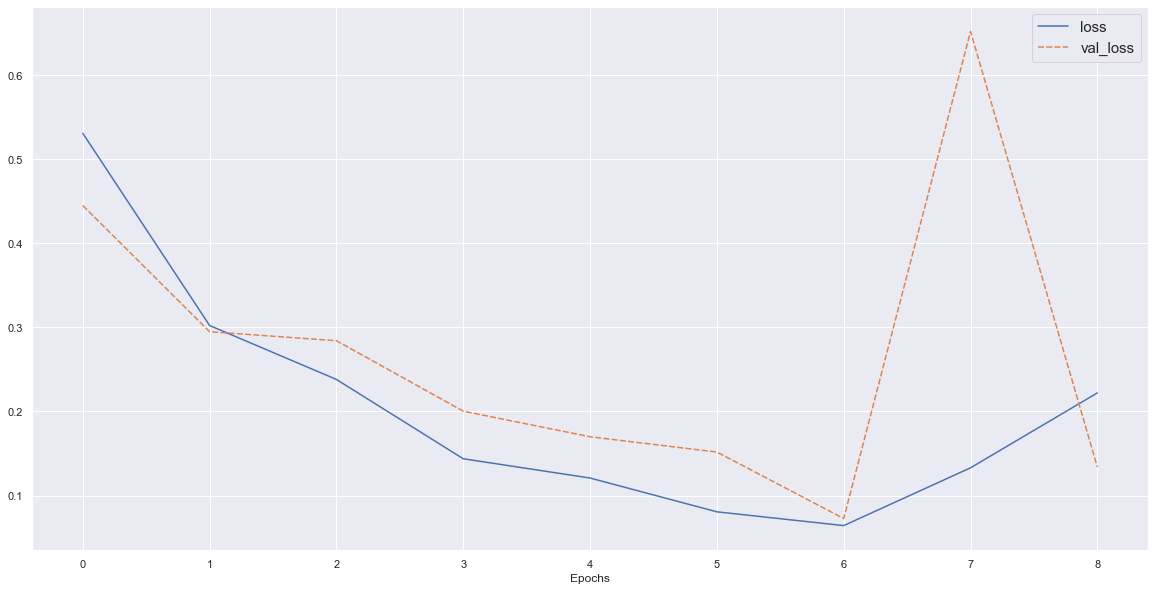

In [181]:
sns.lineplot(data=dfk_loss)
plt.legend(prop={"size":15})
plt.xlabel("Epochs")

### Train vs Test Accuracy

In [184]:
dfk_acc = dfk[["accuracy","val_accuracy"]]

Text(0.5, 0, 'Epochs')

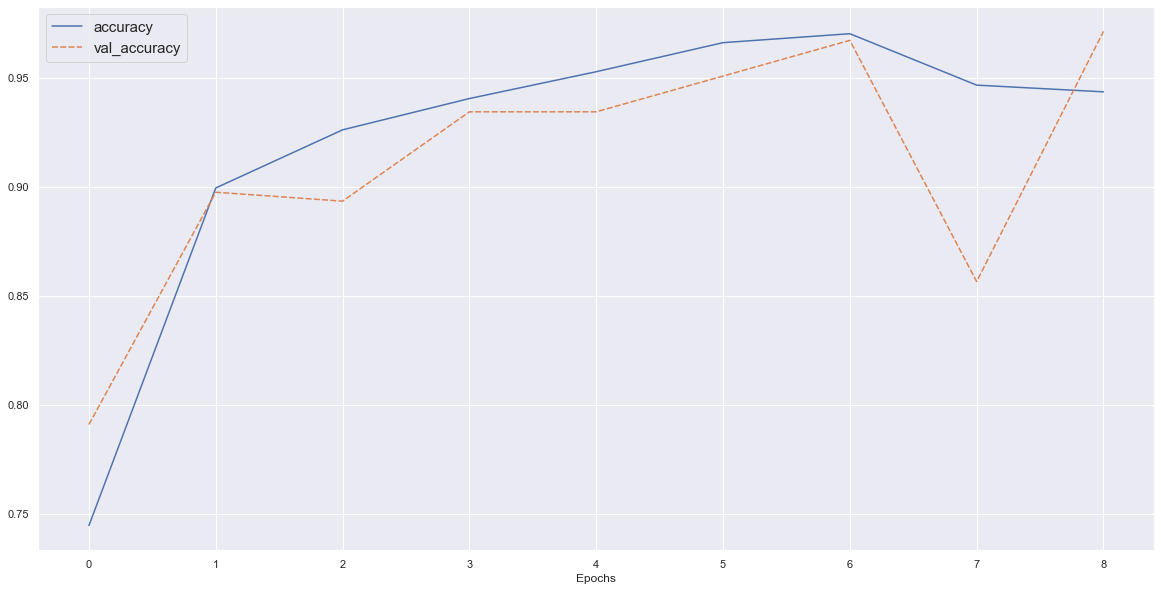

In [185]:
sns.lineplot(data=dfk_acc)
plt.legend(prop={"size":15})
plt.xlabel("Epochs")

### Loss Function vs Epochs

In [179]:
dfk_lossf = dfk[["loss"]]

Text(0.5, 0, 'Epochs')

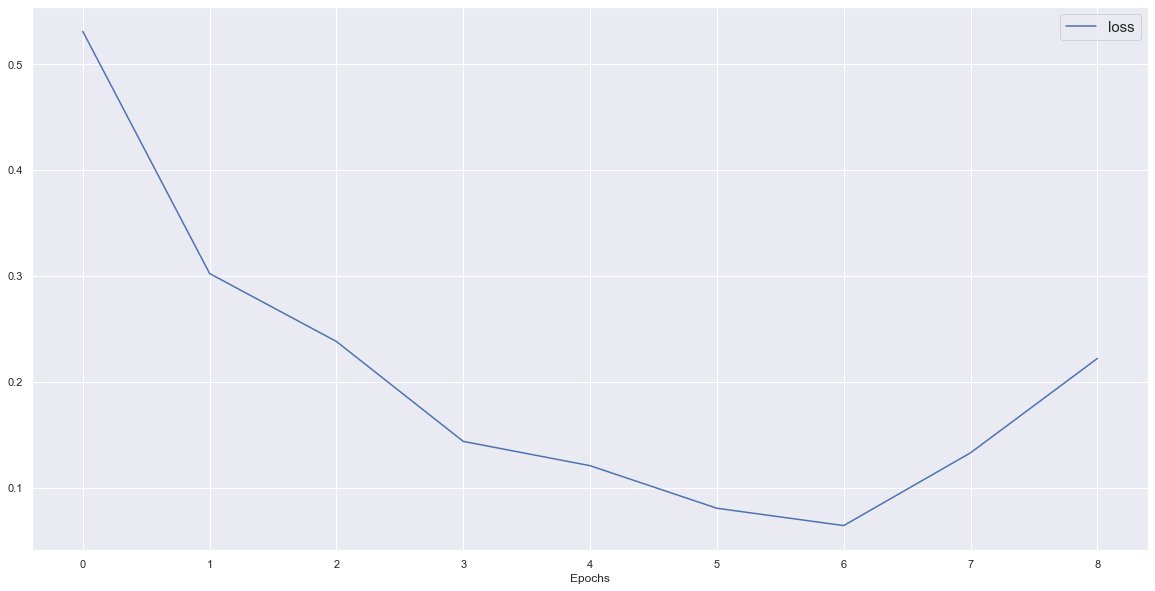

In [186]:
sns.lineplot(data=dfk_lossf)
plt.legend(prop={"size":15})
plt.xlabel("Epochs")